## Schwebungen

In [3]:
# Am Anfang müssen wir ein paar Bibliotheken laden, um alle Funktionen, die wir verwenden möchten, parat zu haben.
from math import *
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

In diesem Notebook betrachten wir Schwebungen, d.h. die Überlagerung von 2 Schwingungen leicht unterschiedlicher Frequenz.

Zunächst betrachten wir eine reine Schwebung, d.h. die Addition von zwei Sinusfunktionen:

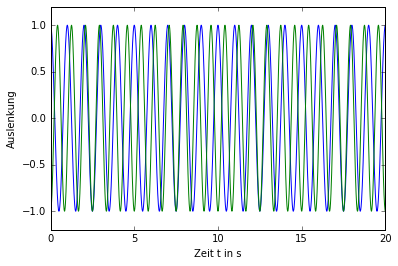

Schwebungsfrequenz (f2-f1)/2 = 0.09999999999999998 Hz
Grundfrequenz      (f1+f2)/2 = 1.1 Hz


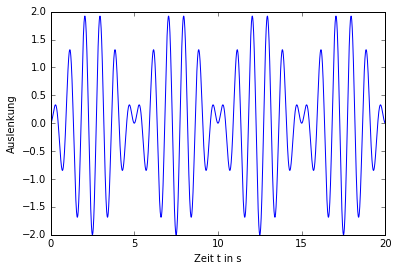

In [4]:
# Zunächst legen wir ein paar Konstanten für die Simulation fest:
dt = 1.0e-2    # Zeitschritt
tmax = 20.0    # maximale Zeit

# Jetzt können wir die beiden Frequenzen definieren:
f1   = 1.0     # Frequenz 1 in Hz
f2   = 1.2    # Frequenz 2 in Hz
a1   = 1.0     # Amplitude für Schwingung 1
a2   = 1.0     # Amplitude für Schwingung 2
phi1 = 0.0     # Phasenverschiebung für Schwingung 1 
phi2 = pi/1.0  # Phasenverschiebung für Schwingung 1 

t = arange(0,tmax,dt)
plot(t,a1*cos(2*pi*f1*t+phi1))
plot(t,a2*cos(2*pi*f2*t+phi2))
ylim(-1.2, 1.2)
xlabel('Zeit t in s')
ylabel('Auslenkung')
show()
plot(t,a1*cos(2*pi*f1*t+phi1)+a2*cos(2*pi*f2*t+phi2))
xlabel('Zeit t in s')
ylabel('Auslenkung')
print("Schwebungsfrequenz (f2-f1)/2 =",0.5*(f2-f1),"Hz")
print("Grundfrequenz      (f1+f2)/2 =",0.5*(f2+f1),"Hz")

Nun betrachten wir einmal gekoppelte Fadenpendel, die über eine Feder mit der Federkonstante kf gekoppelt sind.

Dazu lösen wir die Bewegungsgleichungen numerisch.

Diese sind:
$$\ddot{\theta}_1 = \frac{-m_1 g l_1 \theta_1-b l_1 \dot{\theta}_1+l_1 k_f\left(l_2\theta_2-l_1\theta_1\right)}{m_1 l_1}$$
und 
$$\ddot{\theta}_2 = \frac{-m_2 g l_2 \theta_2-b l_2 \dot{\theta}_2-l_2 k_f\left(l_2\theta_2-l_1\theta_1\right)}{m_2 l_2}$$

Mit dieser Simulation können wir jetzt herumspielen, indem wir die Pendel gleichsinning oder gegensinning schwingen lassen, oder die Schwingung dämpfen.
Es empfiehlt sich, folgendes auszuprobieren:

- gegensinning: theta1_0 = 15° = -theta2_0

- gleichsinning:  theta1_0 = 15° = theta2_0

- Schwebung: theta1_0 = 15°  und theta2_0 = 0

- gedämpfte gekoppelte Schwingung: b = 0.2

- Änderung der Kopplung: kf = 1.0 anstatt 2.0

Nach dem Ändern der Parameter Shift+Enter drücken, damit die Grafik neu berechnet wird.

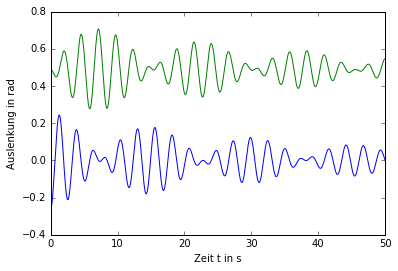

In [10]:
dt     = 1.0e-3      # Zeitschritt in s
tmax   = 50          # Gesamtzeit der Simulation
l1     = 1.0         # Länge des ersten fadenpendels in m
l2     = 1.0         # Länge des zweiten Fadenpendels in m
m1     = 1.0         # Masse am ersten Fadenpendel in kg
m2     = 1.0         # Masse am zweiten Fadenpendel in kg
b      = 0.1         # Dämpfung (z.B Widerstand im Medium, in dem die Pendel schwingen)
g      = 9.81        # Erdbeschleunigung in m/s^2 
kf     = 2.0         # Federkonstante der Feder zwischen den Massen
theta1_0 = -15.0*pi/180 # Anfangsauslenkung des ersten Pendels
theta2_0 = 0.0*pi/180 # Anfangsauslenkung des zweiten Pendels

# Jetzt kann es losgehen
theta1 = []          # Array für Auslenkung des ersten Pendels 
theta2 = []          # Array für Auslenkung des zweiten Pendels 
theta1.append(theta1_0)  # Anfangsauslenkung des ersten Pendels
theta2.append(theta2_0)   # Anfangsauslenkung des zweiten Pendels
# Außerdem müssen wir festlegen, dass am Anfang alles in Ruhe ist
theta1Dot  = 0.0
theta1DDot = 0.0
theta2Dot  = 0.0
theta2DDot = 0.0
dt2 = dt*dt/2.0

# In diesem Loop erfolgt die Integration der Bewegungsgleichungen
for t in arange(0,tmax,dt):
    theta1.append((theta1[-1]+theta1Dot*dt+theta1DDot*dt2))
    theta2.append((theta2[-1]+theta2Dot*dt+theta2DDot*dt2))
    
    theta1Dot  = (theta1[-1]-theta1[-2])/dt
    theta1DDot = (-m1*g*l1*theta1[-1]-b*l1*theta1Dot+kf*l1*(l2*theta2[-1]-l1*theta1[-1]))/(m1*l1)
    theta2Dot  = (theta2[-1]-theta2[-2])/dt
    theta2DDot = (-m2*g*l2*theta2[-1]-b*l2*theta2Dot-kf*l2*(l2*theta2[-1]-l1*theta1[-1]))/(m1*l1)
plot(arange(0,tmax+1*dt,dt),theta1)
plot(arange(0,tmax+1*dt,dt),array(theta2)+2*max(theta1))
xlabel('Zeit t in s')
ylabel('Auslenkung in rad')